<a href="https://colab.research.google.com/github/HJoonKwon/ml_fundamentals/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression 
- Supervised Learning Algorithm
- For Regression Problems
- Minimize MSE(Mean Squared Error)
  - Gradient Descent
  - Newton's method & Hessian Matrix 
- Equal to the linear least-square algorithm

### How does it work?
- Define a hypothesis function h(θ) to predict regression output given input X. For numerical simplicity, bias term is included in X as described blow. 
$$ h_{\theta}(X^{(i)}) = \theta^T X^{(i)} $$
$$ X^{(i)} := [b, (X^{(i)})^T]^T $$
- Define the cost function J, and find θ such that the model minimizes the cost function. Given ```m``` training examples,
$$ J = \frac{1}{2m} \sum_{i=1}^m (h_{\theta}(X^{(i)})-y^{(i)})^2 = \frac{1}{2m} (h_{\theta}(X)-y)^T (h_{\theta}(X)-y)$$
$$ \theta^* = argmin_{\theta} J(\theta)$$
- We can update θ in two ways
  1. Gradient Descent to update θ iteratively using the gradient of J with respect to θ. 
  2. (Least-squres)Directly calculate the optimal θ that makes derivatives of cost function J zero. 

  #### 1) Gradient Descent 
  - α : learning rate 
  - For j-th element of θ
  $$ \theta_j  := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(θ)$$

  #### 2) Least-squares

  $$ \theta^* = (X^T X)^{-1} X^T y $$

In [46]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression as SKModel

from ml_algorithms.linear_regression import * 

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(42)

### 0) Define helper functions 

In [6]:
def normalize(data: np.ndarray):
  data = (data - np.mean(data, axis=0))/np.std(data, axis=0)
  return data 

### 1) Prepare for dataset

In [4]:
data = load_diabetes() 
print(data.keys())
print(data['feature_names'])
print(data['data'].shape)
print(data['target'].shape)
print(data['data'][0])

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
(442, 10)
(442,)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [56]:
X = data['data']
y = data['target']
X = normalize(X)
y = normalize(y)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
train_y = train_y.reshape((-1, 1))
test_y = test_y.reshape((-1, 1))

print(train_X.shape)
print(test_X.shape)
print(X[0])
print(y[0])

(353, 10)
(89, 10)
[ 0.80050009  1.06548848  1.29708846  0.45984057 -0.92974581 -0.73206462
 -0.91245053 -0.05449919  0.41853093 -0.37098854]
-0.014719475152121254


### 2) Visulize some part of data 

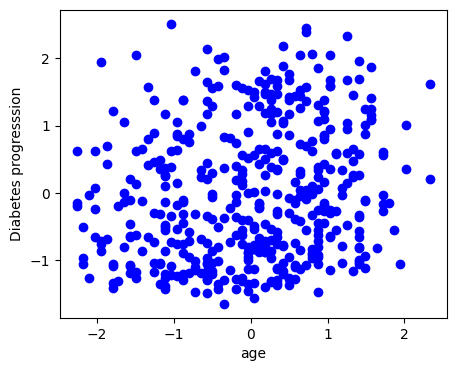

In [57]:
plt.xlabel(data['feature_names'][0])
plt.ylabel('Diabetes progresssion')
plt.plot(X[:, 0], y, 'bo')

### 3) Implement Linear Regression algorithm  

In [65]:
import inspect
lines = inspect.getsource(LinearRegression)
print(lines)

class LinearRegression():
    def __init__(self):
        self.train_X: np.ndarray
        self.train_Y: np.ndarray
        self.theta: np.ndarray

    def fit(self, X: np.ndarray, Y: np.ndarray, learning_rate: float,
            iterations: int) -> None:
        self.train_X = X
        self.train_Y = Y
        self.theta = np.zeros((X.shape[1] + 1, Y.shape[1]))

        costs = []
        for iter in range(iterations):
            Y_hat = self.hypothesis(self.train_X)
            cost = self.cost(Y_hat, self.train_Y)
            costs.append(cost)
            if iter % 5 == 0 and iter != 0:
                print(f"Cost @ iter{iter}= {cost}")
            gradients = self.gradients(Y_hat)
            self.update_parameters(gradients, learning_rate)
        return costs 

    def predict(self, X: np.ndarray):
        Y_hat = self.hypothesis(X)
        return Y_hat

    def cost(self, Y_hat: np.ndarray, Y: np.ndarray):
        m = Y.shape[0]
        loss = 1 / (2 * m) * np.sum((Y_hat - Y

### 4) Test the algorithm 

In [62]:
iterations = 50
learning_rate = 0.1
model = LinearRegression()
train_costs = model.fit(train_X, train_y, learning_rate = learning_rate, iterations = iterations)

Cost @ iter5= 0.28078766174423353
Cost @ iter10= 0.25655700695589495
Cost @ iter15= 0.24892628738921643
Cost @ iter20= 0.24622114716718022
Cost @ iter25= 0.2451758932336424
Cost @ iter30= 0.24473280011501264
Cost @ iter35= 0.24452481117372002
Cost @ iter40= 0.24441544267373153
Cost @ iter45= 0.2443502904852739


In [59]:
my_preds = model.predict(test_X)
my_cost = model.cost(my_preds, test_y)
print(my_cost)

0.24296997248374583


In [60]:
validate_model = SKModel()
validate_model.fit(train_X, train_y)
validate_preds = validate_model.predict(test_X)
validate_cost = model.cost(validate_preds, test_y)
print(validate_cost)

0.2445404657014974


Text(0, 0.5, 'J')

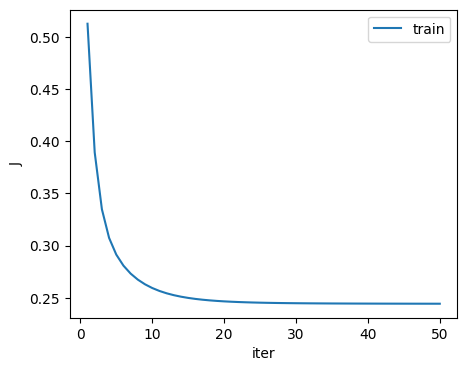

In [64]:
plt.plot(range(1, iterations+1), train_costs, label='train')
plt.legend()
plt.xlabel('iter')
plt.ylabel('J')

## References 
- https://towardsdatascience.com/coding-linear-regression-from-scratch-c42ec079902